### Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import json

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
!pip install spacy
!python -m spacy download en_core_web_sm

2022-05-13 19:19:23.584145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-05-13 19:19:23.584203: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\vitor\AppData\Local\Temp\pip-req-build-x9ic_3wn'



  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\vitor\appdata\local\temp\pip-req-build-x9ic_3wn
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7692 sha256=9ae7aa9f101c6de27dd661e3302456405a95775b7c1868e53b1fc670c793ef2a
  Stored in directory: C:\Users\vitor\AppData\Local\Temp\pip-ephem-wheel-cache-0a6udsyn\wheels\d1\c3\bb\559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [5]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


### Importação do Corpus Português-Br

In [8]:
true=[]
for i in range(1,3601):
    try:
        with open(r'C:\Users\vitor\Documents\TCC.v3\Software\Fake.br-Corpus\full_texts\true\\'+str(i)+'.txt', encoding ="utf8") as t:
            true.append(t.read())
    except:
        pass

In [9]:
df_true = pd.DataFrame(true, columns = ['texto'])

In [10]:
print(df_true)

                                                  texto
0     ﻿O Podemos decidiu  expulsar o deputado federa...
1     Em evento realizado nesta terça-feira para div...
2     ﻿Após o prefeito de Manaus Arthur Virgílio (PS...
3     ﻿Doria vai receber Zé Celso após reunião com r...
4     Gustavo Pedreira Ferraz, que admitiu buscar ma...
...                                                 ...
3593  Ficou longe das notícias no fim de ano? Veja o...
3594   A nova denúncia contra o ex-presidente Luiz I...
3595  Como a Bahia virou uma potência mundial do mar...
3596  Alvo da Lava Jato, Bendine tinha passagem comp...
3597  Chefs convidados do Encontro Mundial das Cidad...

[3598 rows x 1 columns]


In [11]:
fake=[]
for i in range(1,3601):
    try:
        with open(r'C:\Users\vitor\Documents\TCC.v3\Software\Fake.br-Corpus\full_texts\fake\\'+str(i)+'.txt', encoding ="utf8") as t:
            fake.append(t.read())
    except:
        pass

In [12]:
df_fake = pd.DataFrame(fake, columns = ['texto'])

In [13]:
print(df_fake)

                                                  texto
0     Kátia Abreu diz que vai colocar sua expulsão e...
1     Blog esquerdista dá a entender que reclamar de...
2     Alckmin diz que por ele PSDB desembarca, mas...
3     Cara de pau não tem limites: Zé Celso aciona M...
4     Temer resolve o problema de Luislinda: liberd...
...                                                 ...
3593  Grupo de 100 mil pessoas quer criar novo país ...
3594  Montadoras pagaram R$ 36 milhões para aprovar ...
3595  Deputado do PT não sabia que estava sendo film...
3596  Cunha cancelou a viagem à Itália porque poderi...
3597  Mulher bêbada invade Planalto e diz que é "mar...

[3598 rows x 1 columns]


### Preprocessing dos textos

In [14]:
df_true['texto'] = df_true['texto'].apply(lambda x: str(x).lower())
df_fake['texto'] = df_fake['texto'].apply(lambda x: str(x).lower())

In [15]:
df_true['class'] = 1
df_fake['class'] = 0

In [16]:
df_true.columns

Index(['texto', 'class'], dtype='object')

In [17]:
data = df_true.append(df_fake, ignore_index=True)

In [18]:
import preprocess_kgptalkie as ps

In [19]:
#Método antido de remover caracteres especiais
#data['texto'].apply(lambda x: ps.remove_special_chars(x))

In [20]:
#Removes punctuation from every text within the DataFrame

def remove_punct(raw_string):
  '''Eliminates punctuations and numbers from raw_string.'''
  translator = raw_string.maketrans({key:'' for key in string.punctuation.replace("-", '') + "“”‘’0123456789"})

  return raw_string.translate(translator)

data['texto'] = data['texto'].apply(func=remove_punct)

In [21]:
print(data['texto'][0])

﻿o podemos decidiu  expulsar o deputado federal carlos gaguim do partido após a polícia federal fazer buscas a apreensões no gabinete dele na câmara com isso a legenda abre espaço para receber a senadora expulsa pelo pmdb katia abreu por meio de nota a legenda informou que o afastamento do parlamentar já era algo acordado entre os filiados da sigla  ainda que o parlamentar tenha comunicado a conclusão de sua desfiliação para esta semana diante dos fatos noticiados hoje a executiva nacional do podemos solicita o imediato cancelamento de sua filiação dos quadros do partido

o partido que no passado chegou a cogitar lançar o parlamentar como candidato ao senado diz que apoia a investigação com a ampla apuração dos eventuais crimes cometidos e a consequente responsabilização dos envolvidos para que todos sejam punidos com o máximo rigor da lei independentemente de posição ou cargo ocupado 


### Vectorization - Word2Vec

In [22]:
import gensim

In [23]:
y = data['class'].values

In [24]:
X = [d.split() for d in data['texto'].tolist()]

In [25]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [26]:
w2v_model.wv.most_similar('bolsonaro')

[('jair', 0.879625678062439),
 ('ciro', 0.7895736694335938),
 ('presidenciável', 0.7538529634475708),
 ('psl', 0.7505614161491394),
 ('alckmin', 0.7469662427902222),
 ('pré-candidato', 0.7136333584785461),
 ('boulos', 0.7064557671546936),
 ('psc-rj', 0.6880162954330444),
 ('jean', 0.6782283186912537),
 ('huck', 0.6771867275238037)]

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [28]:
X = tokenizer.texts_to_sequences(X)

In [29]:
#tokenizer.word_index - coloca as palavras em ordem de aparecimento

### Analisando tamanho dos textos

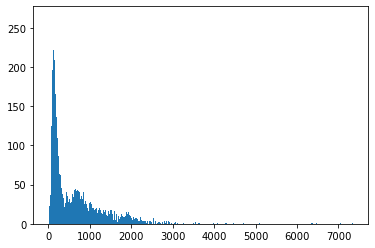

In [30]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [31]:
#verificando quantas notícias tem mais do que o número de palavras especificado
nos = np.array([len(x) for x in X])
len(nos[nos>500])

3146

In [32]:
maxlen = 500
X = pad_sequences(X, maxlen=maxlen)

In [33]:
vocab_size = len(tokenizer.word_index) + 1 #verificar novamente em 1h09 o pq do "+1"
vocab = tokenizer.word_index

In [34]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [35]:
embedding_vectors = get_weight_matrix(w2v_model)

### Criando o modelo de rede neural

In [36]:
#colocar trainable = True pra ver se melhora o resultado se a ML ficar retrinando
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          8998800   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9,116,177
Trainable params: 117,377
Non-trainable params: 8,998,800
_________________________________________________________________


### Treinando o modelo

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [39]:
model.fit(X_train, y_train, validation_split=0.1, epochs=6)

Epoch 1/6
152/152 [==============================] - 112s 700ms/step - loss: 0.6097 - acc: 0.6588 - val_loss: 0.6672 - val_acc: 0.5611
Epoch 2/6
152/152 [==============================] - 112s 736ms/step - loss: 0.6132 - acc: 0.6329 - val_loss: 0.6018 - val_acc: 0.6500
Epoch 3/6
152/152 [==============================] - 108s 710ms/step - loss: 0.4239 - acc: 0.8128 - val_loss: 0.3807 - val_acc: 0.8333
Epoch 4/6
152/152 [==============================] - 107s 703ms/step - loss: 0.2152 - acc: 0.9236 - val_loss: 0.2610 - val_acc: 0.9019
Epoch 5/6
152/152 [==============================] - 103s 680ms/step - loss: 0.2432 - acc: 0.9201 - val_loss: 0.2531 - val_acc: 0.9130
Epoch 6/6
152/152 [==============================] - 105s 690ms/step - loss: 0.2049 - acc: 0.9277 - val_loss: 0.2061 - val_acc: 0.9333


In [40]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

In [41]:
accuracy_score(y_test, y_pred)

0.9555308504724848

In [42]:
def saveModel(model,dicto):
    name = input('nome do modelo:')
    model.save(str(name)+'.h5')
    with open('wordIndex.json','w') as f:
        json.dump(dicto,f,indent = "")
    print('Model saved!')
    return

In [43]:
saveModel(model, vocab)

nome do modelo:modelo_truncado500
Model saved!


### Vasculhador de notícias para testes

In [ ]:
noticia = X_train[0].tolist()  #notícia teste ou treino a ser analisada

In [ ]:
vocab = tokenizer.word_index
vocab[""] = 0
inv_vocab = {v: k for k, v in vocab.items()}

In [ ]:
news=[]
for token in noticia:
    news.append(inv_vocab[token])  #inv_vocab[token] é a palavra correspondente ao token.

In [ ]:
noticia_ok = ' '.join([str(item) for item in news])
print(noticia_ok)

In [ ]:
df_true['texto'][4]